In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean


In [2]:
data = pd.read_csv('C:/Users/User/IU/EDA & Data Viz/Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.shape

(2938, 22)

In [4]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# While reading the metadata about the dataset on Kaggle, I found that one of the variables is mistakenly named. The "thinness 1-19 years" should be 
# "thinness 10-19 years" because it is supposed to show the "Prevalence of thinness among children and adolescents for Age 10 to 19 (% )" (Kaggle)

#Rename the column 
data = data.rename(columns={' thinness  1-19 years': 'thinness 10-19 years'})

In [6]:
# Pythonize column names 
def name_pythonizer(column_name):
    # Remove leading/trailing whitespace
    column_name = column_name.strip()
    #makes all names lowercase
    column_name = column_name.lower()
    # uses the first argument of the replace() method as a regex. Thus, it replaces both '.' and ' ' with '_'
    column_name = column_name.replace('.', '_').replace(' ', '_')
    return column_name

data.columns = data.columns.map(name_pythonizer)
data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [7]:
data.dtypes

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

## Explanation of the dataset 
The dataset contains information for 193 countries for different years, ranging between 2000 and 2015. Each observation represents a given country for a certain year, for example Afghanistan 2000, Afghanistan 2001, etc. 

#### Show missing values

C:\Users\user\AppData\Local\Temp\ipykernel_33492\3750497704.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x='Column', y='Missing Values', palette='magma')


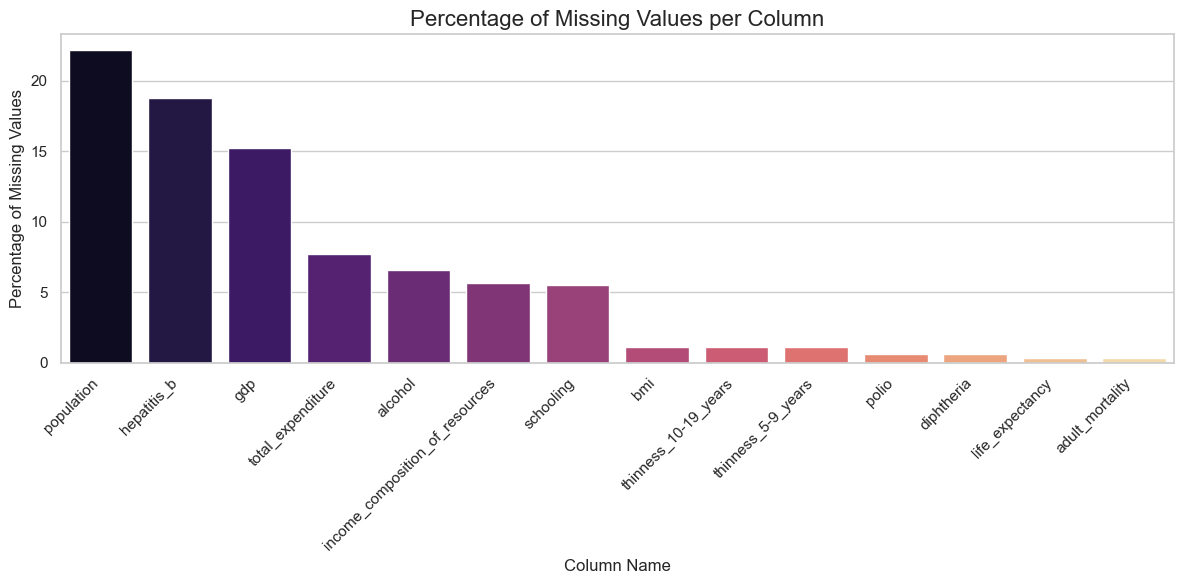

In [10]:
missing_values = data.isnull().sum()
missing_values = (data.isnull().sum() / len(data)) * 100
missing_values = missing_values[missing_values > 0]

# Create a DataFrame for better control with seaborn
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'Missing Values']
missing_df = missing_df.sort_values(by='Missing Values', ascending=False)

# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_df, x='Column', y='Missing Values', palette='magma')

# Add title and rotate x-axis labels
plt.title('Percentage of Missing Values per Column', fontsize=16)
# plt.text(0.5, 1.02, 'Percentage of Missing Data', ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save to file
plt.savefig("percentage_missing_values.png")  # You can also use .pdf, .svg, .jpg

plt.show()


In [11]:
missing_values = data.isnull().sum()
missing_values

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

#### Check for dublicates

In [13]:
data.duplicated().sum()

0

In [14]:
data.nunique()


country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmi                                 608
under-five_deaths                   252
polio                                73
total_expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness_10-19_years                200
thinness_5-9_years                  207
income_composition_of_resources     625
schooling                           173
dtype: int64

## The dataset can be considered clean enough.

## We can now begin examining some variables

In [17]:
data.year.value_counts()

year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

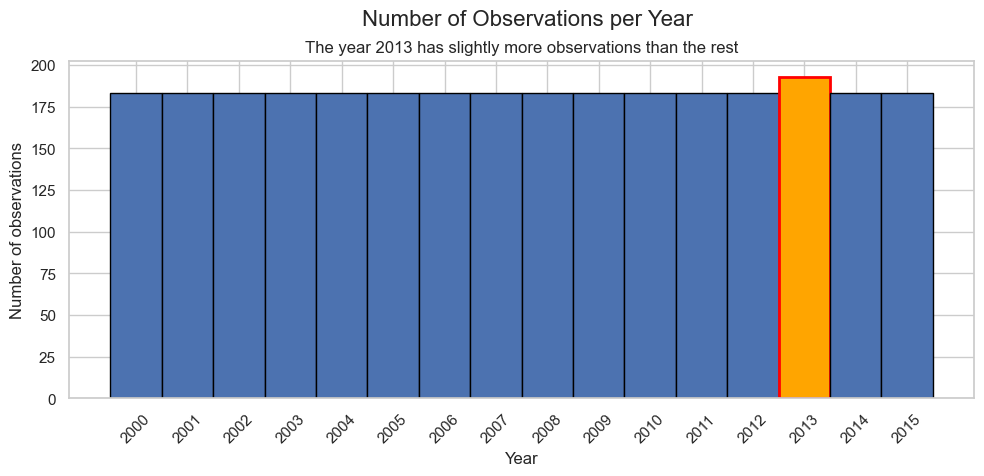

In [18]:
plt.figure(figsize=(10, 5))

# Create histogram and get bin info
counts, bins, patches = plt.hist(data.year, bins=16, edgecolor='black')

# Compute bin centers for x-axis ticks
bin_centers = 0.5 * (bins[1:] + bins[:-1])
tick_labels = [str(int(round(c))) for c in bin_centers]
plt.xticks(bin_centers, tick_labels, rotation=45)

# Highlight the bin that contains 2013
for i in range(len(patches)):
    if bins[i] <= 2013 < bins[i + 1]:
        patches[i].set_facecolor('orange')
        patches[i].set_edgecolor('red')
        patches[i].set_linewidth(2)

plt.title('The year 2013 has slightly more observations than the rest', fontsize=12)
plt.suptitle('Number of Observations per Year', x=0.535, y=0.95, fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of observations')

plt.tight_layout()
plt.savefig("number_observations_per_year.png")
plt.show()

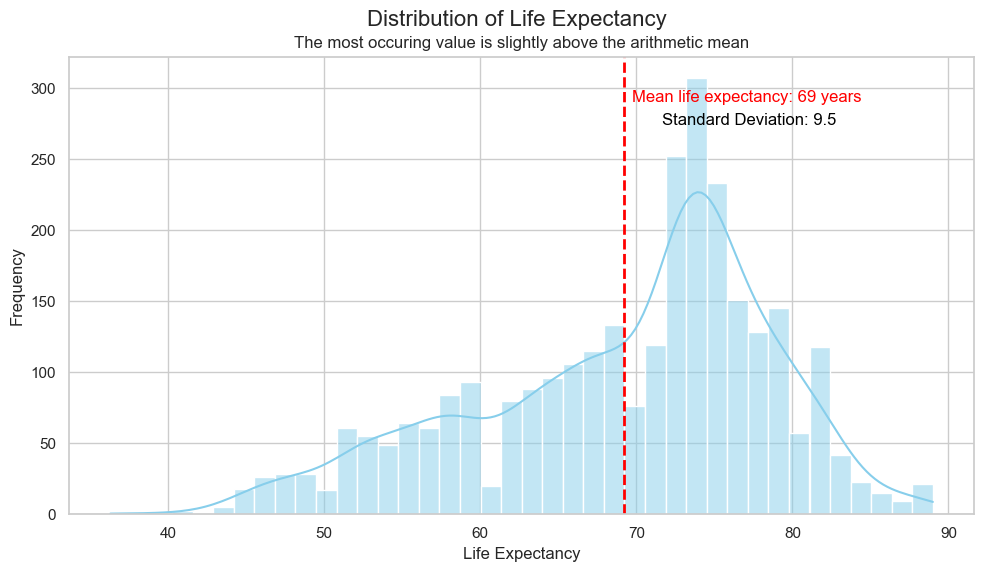

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data.life_expectancy, bins=40, kde=True, color='skyblue')

# Calculate the mean life expectancy as well as the standard deviation
mean_life_expectancy = data['life_expectancy'].mean()
std_life_expectancy = data.life_expectancy.std()

# Add vertical dotted line at the mean
plt.axvline(mean_life_expectancy, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_life_expectancy:.2f}')

# Add text annotation
plt.text(mean_life_expectancy + 0.5, plt.gca().get_ylim()[1]*0.9, 
         f'Mean life expectancy: {mean_life_expectancy:.0f} years', 
         color='red', fontsize=12)

# Std deviation annotation
plt.text(plt.gca().get_xlim()[1] - 20, plt.gca().get_ylim()[1]*0.85, 
         f'Standard Deviation: {std_life_expectancy:.1f}', 
         fontsize=12, color='black')


plt.title('The most occuring value is slightly above the arithmetic mean', fontsize=12)
plt.suptitle('Distribution of Life Expectancy', x=0.525, y=0.95, fontsize=16)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('life_expectancy_dist.png')
plt.show()

#### Due to the outliers, I will try calculating the trimmed mean as well and check if there is any meaningful difference

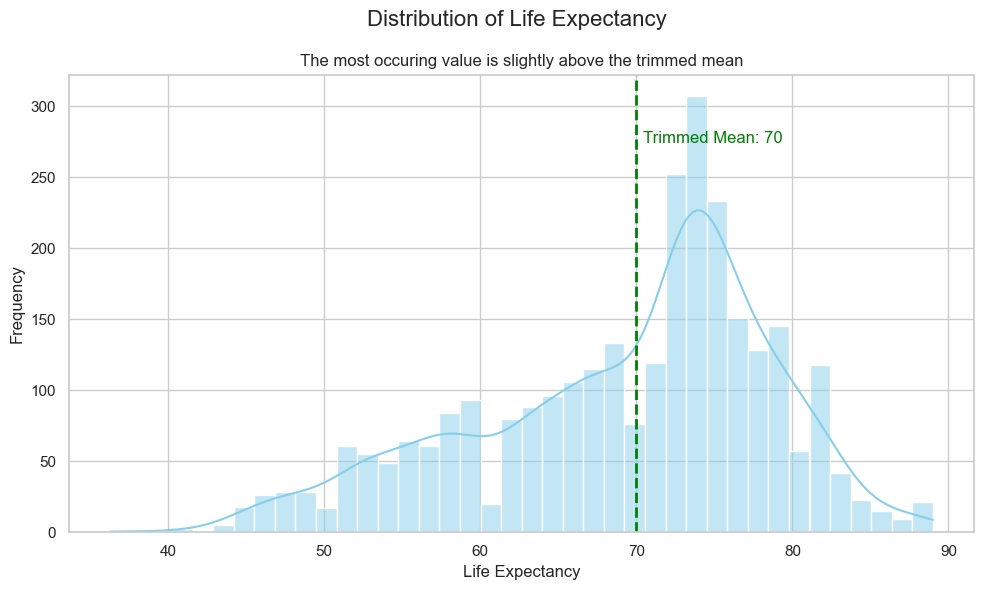

In [21]:
# Calculate trimmed mean (10% from each tail)
truncated_mean = trim_mean(data.life_expectancy, proportiontocut=0.1)

plt.figure(figsize=(10, 6))
sns.histplot(data.life_expectancy, bins=40, kde=True, color='skyblue')

# Plot trimmed mean
plt.axvline(truncated_mean, color='green', linestyle='--', linewidth=2, label=f'Trimmed Mean: {truncated_mean:.0f}')
plt.text(truncated_mean + 0.5, plt.gca().get_ylim()[1]*0.85, 
         f'Trimmed Mean: {truncated_mean:.0f}', 
         color='green', fontsize=12)

plt.title('The most occuring value is slightly above the trimmed mean', fontsize=12)
plt.suptitle('Distribution of Life Expectancy', x=0.525, fontsize=16)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
# Calculate trimmed mean for 15% and 20% from each tail 
truncated_mean_15 = trim_mean(data.life_expectancy, proportiontocut=0.15)
truncated_mean_20 = trim_mean(data.life_expectancy, proportiontocut=0.2)
print(f'Trimmed mean for 15%: {truncated_mean_15} \nTrimmed mean for 20%: {truncated_mean_20}')

Trimmed mean for 15%: 70.28279883381924 
Trimmed mean for 20%: 70.61411564625851


#### Apparently, no significant difference. I will now have a look on the dataset from a greater perspective.

In [24]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### adult_mortality ans measles are very skewed, so let us check them

In [26]:
data.adult_mortality

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: adult_mortality, Length: 2938, dtype: float64

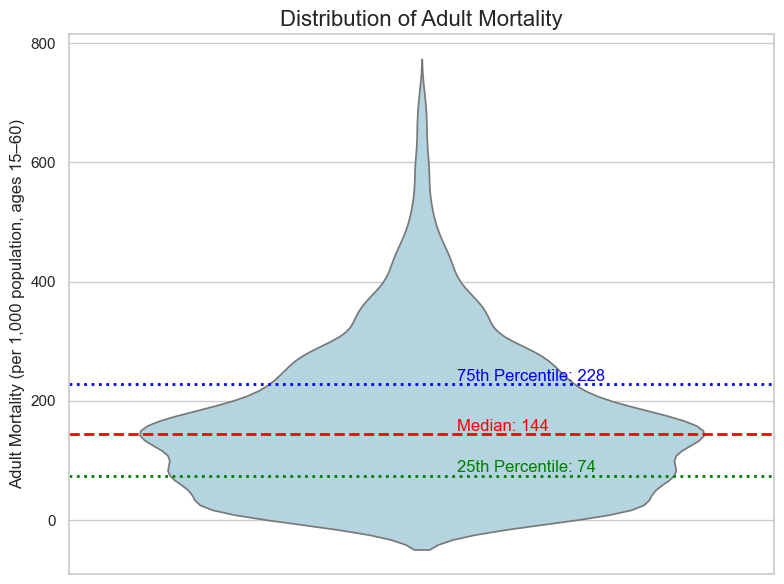

In [27]:
#SHOW adult_mortality

plt.figure(figsize=(8, 6))
sns.violinplot(y=data['adult_mortality'], color='lightblue', inner=None)

# Calculate statistics
median = data['adult_mortality'].median()
q1 = data['adult_mortality'].quantile(0.25)
q3 = data['adult_mortality'].quantile(0.75)

# Add horizontal lines for quartiles and median
plt.axhline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.0f}')
plt.axhline(q1, color='green', linestyle=':', linewidth=2, label=f'25th Percentile: {q1:.0f}')
plt.axhline(q3, color='blue', linestyle=':', linewidth=2, label=f'75th Percentile: {q3:.0f}')

# Add text annotations directly on the plot
plt.text(x=0.05, y=median + 1, s=f'Median: {median:.0f}', color='red', fontsize=12, va='bottom')
plt.text(x=0.05, y=q1 + 1, s=f'25th Percentile: {q1:.0f}', color='green', fontsize=12, va='bottom')
plt.text(x=0.05, y=q3 + 1, s=f'75th Percentile: {q3:.0f}', color='blue', fontsize=12, va='bottom')

plt.title('Distribution of Adult Mortality', fontsize=16)
plt.ylabel('Adult Mortality (per 1,000 population, ages 15–60)')
plt.xlabel('')
plt.tight_layout()
plt.savefig('adult_mortality')
plt.show()

#Note: This is a highly skewed distribution 

C:\Users\user\AppData\Local\Temp\ipykernel_33492\4200869032.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['measles'], shade=True, color='skyblue')


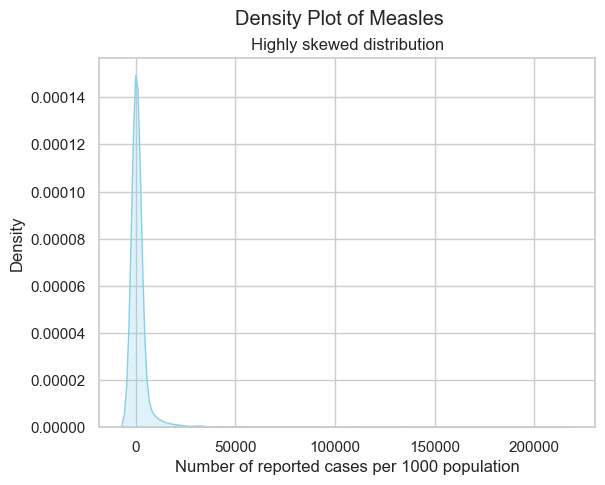

In [28]:
sns.kdeplot(data['measles'], shade=True, color='skyblue')

plt.title('Highly skewed distribution')
plt.suptitle('Density Plot of Measles')
plt.xlabel('Number of reported cases per 1000 population')
plt.ylabel('Density')
plt.show()

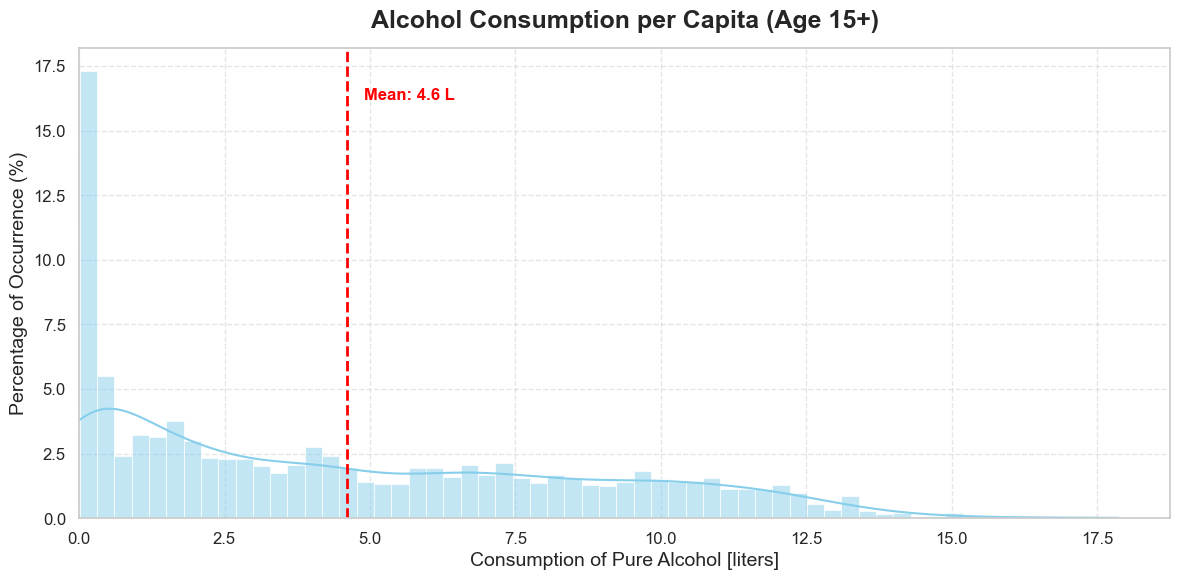

In [29]:
# The variables alchohol may as well be interesting

# Calculate the mean
mean_alcohol = data.alcohol.mean()

# Set Seaborn style
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

plt.figure(figsize=(12, 6))

# Histogram with KDE and percentage y-axis
sns.histplot(
    data.alcohol,
    bins=60,
    kde=True,
    color='skyblue',
    stat='percent',
    edgecolor='white',
    linewidth=0.5
)

# Add mean as a vertical line
plt.axvline(mean_alcohol, color='red', linestyle='--', linewidth=2)

# Add mean annotation slightly above the curve
plt.text(mean_alcohol + 0.3, plt.gca().get_ylim()[1] * 0.9,
         f'Mean: {mean_alcohol:.1f} L',
         color='red', fontsize=12, va='center', weight='bold')

# Axis limits and labels
plt.xlim(left=0)
plt.title('Alcohol Consumption per Capita (Age 15+)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Consumption of Pure Alcohol [liters]', fontsize=14)
plt.ylabel('Percentage of Occurrence (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


#### Now let us examine the correlation between life_expectancy and all other meaningfully related variables (i.e. without year, status and country)

C:\Users\user\AppData\Local\Temp\ipykernel_33492\251068373.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_corr_sorted.values, y=life_corr_sorted.index, palette='coolwarm')


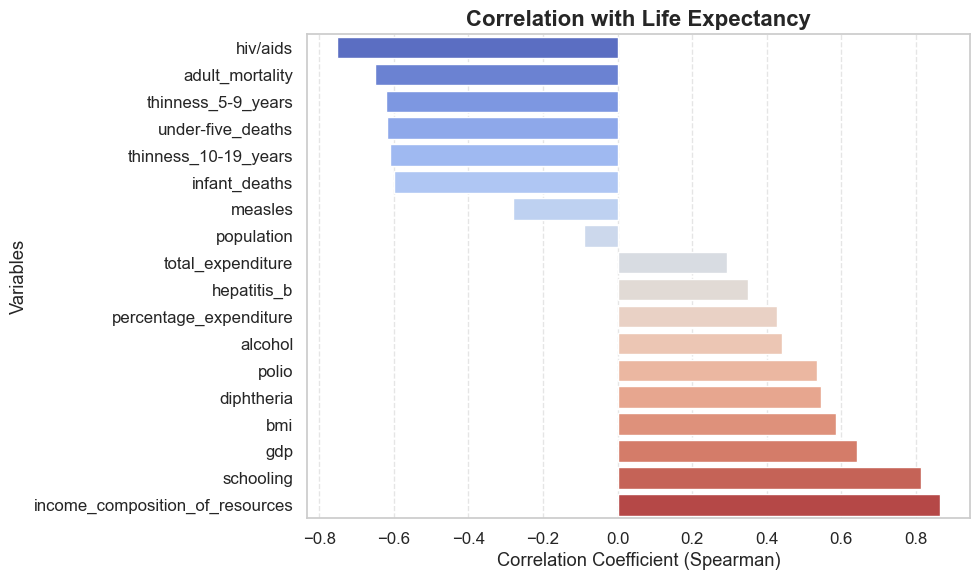

In [31]:
# Exclude 'year' and 'name' from correlation
correlations = data.drop(columns=['year', 'country', 'status']).corr(method='spearman')

# Get only correlations with 'life_expectancy'
life_corr = correlations['life_expectancy'].drop('life_expectancy')

# Sort correlations
life_corr_sorted = life_corr.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=life_corr_sorted.values, y=life_corr_sorted.index, palette='coolwarm')

plt.title('Correlation with Life Expectancy', fontsize=16, weight='bold')
plt.xlabel('Correlation Coefficient (Spearman)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('correlation_life_exp.png')
plt.show()


In [32]:
# Exclude 'year' and 'name' from correlation
data_corr = data.drop(columns=['year', 'country', 'status'])

# Calculate correlations with life_expectancy
corr_pearson = data_corr.corr(method='pearson')['life_expectancy']
corr_spearman = data_corr.corr(method='spearman')['life_expectancy']
corr_kendall = data_corr.corr(method='kendall')['life_expectancy']

# Combine into one DataFrame
correlation_table = pd.DataFrame({
    'Spearman': corr_spearman,
    'Pearson': corr_pearson,    
    'Kendall': corr_kendall
})

# Drop the row for life_expectancy itself
correlation_table = correlation_table.drop('life_expectancy')

# Optional: round for readability
correlation_table = correlation_table.round(3)

# Display the table
correlation_table.sort_values(by='Spearman', ascending=False)


,Spearman,Pearson,Kendall
income_composition_of_resources,0.866,0.725,0.693
schooling,0.814,0.752,0.616
gdp,0.642,0.461,0.466
bmi,0.585,0.568,0.428
diphtheria,0.545,0.479,0.379
polio,0.535,0.466,0.370
alcohol,0.443,0.405,0.295
percentage_expenditure,0.429,0.382,0.311
hepatitis_b,0.350,0.257,0.236
total_expenditure,0.294,0.218,0.209


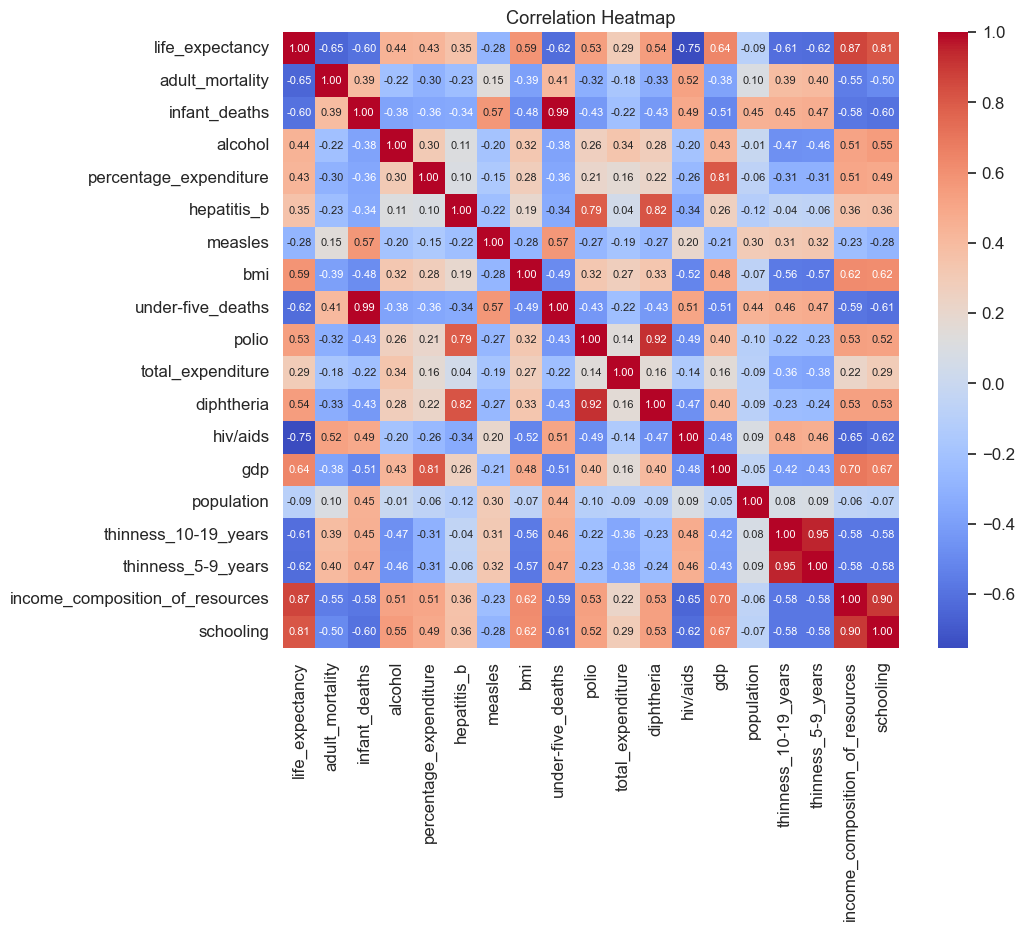

In [33]:
corr_matrix = data_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, annot_kws={"size": 8}, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

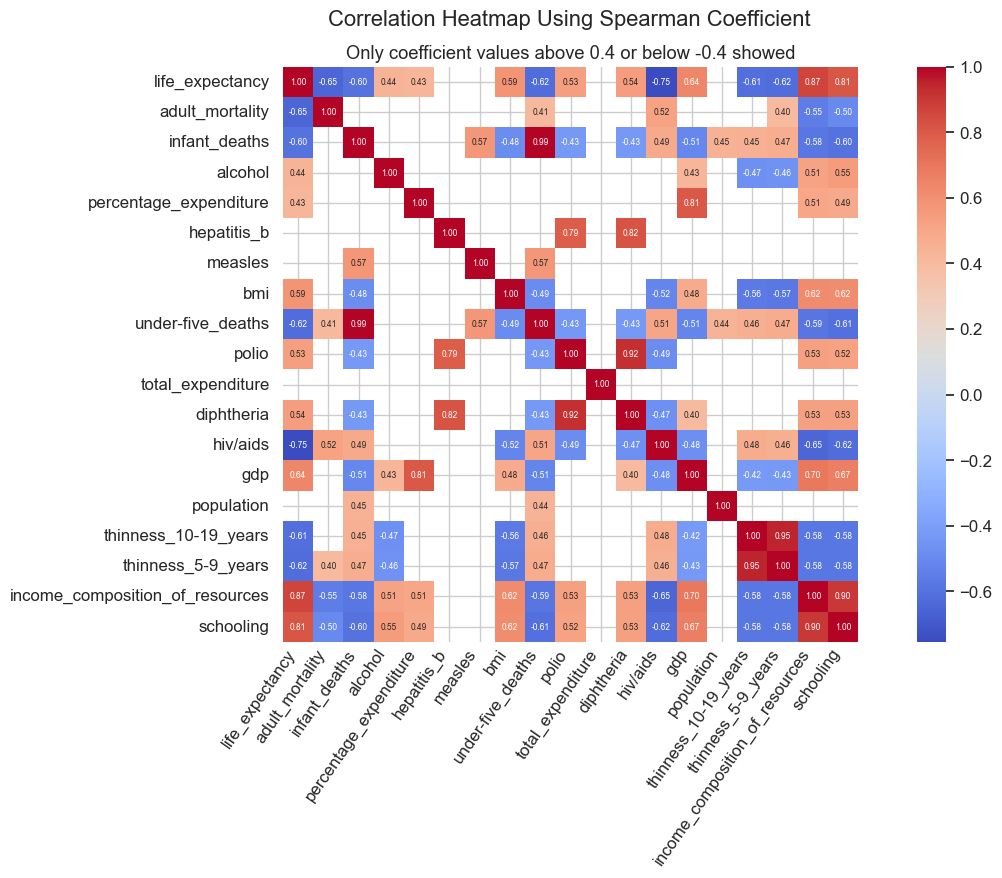

In [34]:
corr_matrix = data_corr.corr(method='spearman')
# Filter correlations: keep only those > 0.4 or < -0.4
filtered_corr = corr_matrix.where((corr_matrix > 0.4) | (corr_matrix < -0.4))

plt.figure(figsize=(14, 10))  # Adjust size as needed
ax = sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, annot_kws={"size": 6}, cbar=True)
plt.suptitle('Correlation Heatmap Using Spearman Coefficient', x=0.61, y = 0.925)
plt.title('Only coefficient values above 0.4 or below -0.4 showed')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave room for suptitle
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right')

# Bring x-axis labels closer by manually adjusting position
for label in ax.get_xticklabels():
    label.set_y(0.015)  # smaller = closer; try -0.08 or -0.1 if need
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.savefig('corr_0_4_2.png', bbox_inches='tight')

plt.show()

#### Analysis
Apparently, the income composition of resources has a strong influence on the life expectancy. 
Therefore, this vairable is examined in more details.

In [36]:
data.income_composition_of_resources.describe()

count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: income_composition_of_resources, dtype: float64

#### Observation 
We see a minimum value of 0, which is highly odd. Technically, this would mean a GNI (gross net income) per capita less than 100$. 
Therefore, the occurence of this extreme value is checked in order to make sure it is not an error.

In [38]:
data[['country', 'year', 'status']][data.income_composition_of_resources == 0]

,country,year,status
74,Antigua and Barbuda,2005,Developing
75,Antigua and Barbuda,2004,Developing
76,Antigua and Barbuda,2003,Developing
77,Antigua and Barbuda,2002,Developing
78,Antigua and Barbuda,2001,Developing
...,...,...,...
2853,Vanuatu,2004,Developing
2854,Vanuatu,2003,Developing
2855,Vanuatu,2002,Developing
2856,Vanuatu,2001,Developing


In [39]:
data[['country']][data.income_composition_of_resources == 0].country.unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bhutan',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Cabo Verde', 'Chad',
       'Comoros', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Georgia',
       'Grenada', 'Guinea-Bissau', 'Kiribati', 'Lebanon', 'Madagascar',
       'Micronesia (Federated States of)', 'Montenegro', 'Nigeria',
       'Oman', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Seychelles', 'South Sudan', 'Suriname',
       'The former Yugoslav republic of Macedonia', 'Timor-Leste',
       'Turkmenistan', 'Uzbekistan', 'Vanuatu'], dtype=object)

In [40]:
data[['country', 'year']][data.income_composition_of_resources == 0].year.value_counts(normalize=True)

year
2000    0.238462
2003    0.130769
2002    0.130769
2001    0.130769
2004    0.115385
2005    0.100000
2010    0.030769
2009    0.030769
2008    0.030769
2007    0.030769
2006    0.030769
Name: proportion, dtype: float64

In [41]:
data[['country', 'year', 'status']][data.income_composition_of_resources == 0].status.value_counts()

status
Developing    130
Name: count, dtype: int64

#### Conclusion of error
All countries with this extreme value are developing countries. Moreover, approximately 63% of the aforementioned observations date back to the period 2000-2003.   
With this newly acquired information in mind, it can be concluded that the value of 0 for income_composition_of_resources is plausible, i.e. there is no evidence provided that these values are errors.  
The analysis of the variable is continued.

<Axes: >

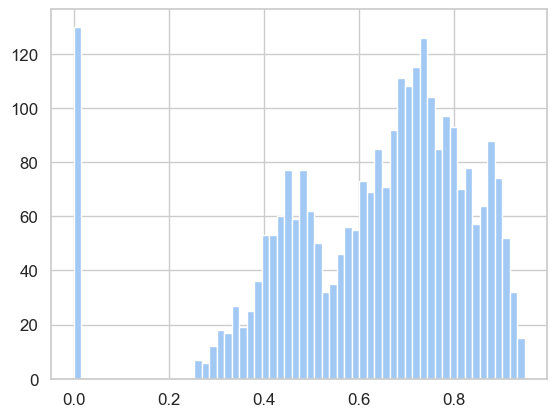

In [43]:
data.income_composition_of_resources.hist(bins=60)

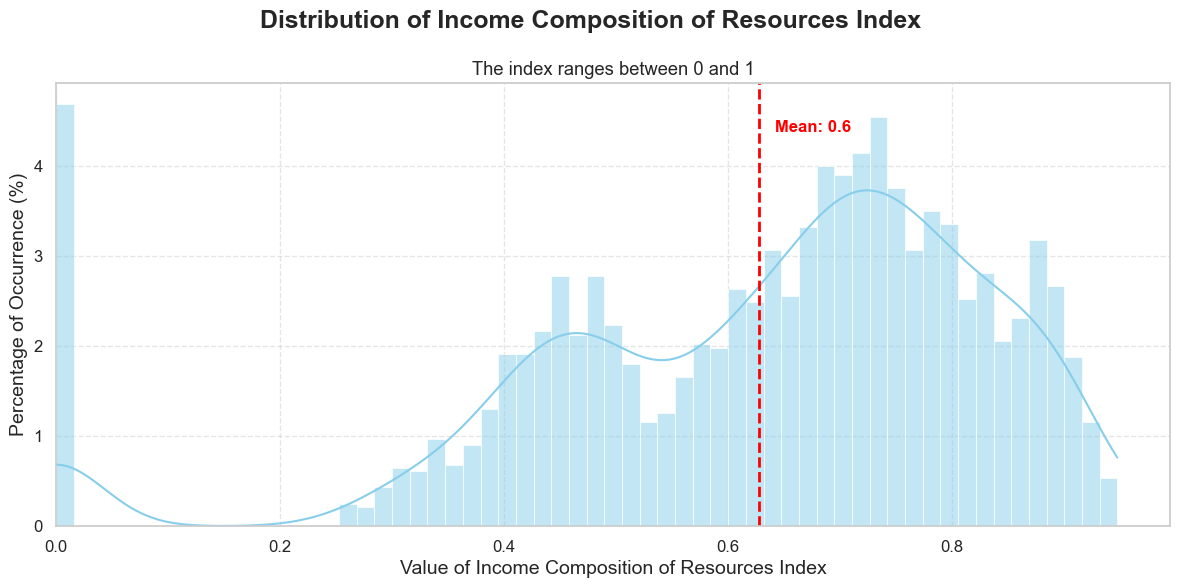

In [44]:
# Show alcohol

# Calculate the mean
mean_icr = data.income_composition_of_resources.mean()  #icr stands for "income composition of resources"

# Set Seaborn style
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

plt.figure(figsize=(12, 6))

# Histogram with KDE and percentage y-axis
sns.histplot(
    data.income_composition_of_resources,
    bins=60,
    kde=True,
    color='skyblue',
    stat='percent',
    edgecolor='white',
    linewidth=0.5
)

# Add mean as a vertical line
plt.axvline(mean_icr, color='red', linestyle='--', linewidth=2)

# Add mean annotation slightly above the curve
plt.text(mean_icr + 0.015, plt.gca().get_ylim()[1] * 0.9,
         f'Mean: {mean_icr:.1f}',
         color='red', fontsize=12, va='center', weight='bold')

# Axis limits and labels
plt.xlim(left=0)
plt.suptitle('Distribution of Income Composition of Resources Index', x=0.5, fontsize=18, weight='bold')
plt.title('The index ranges between 0 and 1')
plt.xlabel('Value of Income Composition of Resources Index', fontsize=14)
plt.ylabel('Percentage of Occurrence (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


The following figure shows the growth of the mean income composition of resources over the years.

C:\Users\user\AppData\Local\Temp\ipykernel_33492\4102839733.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='income_composition_of_resources', ci=None, color='teal')


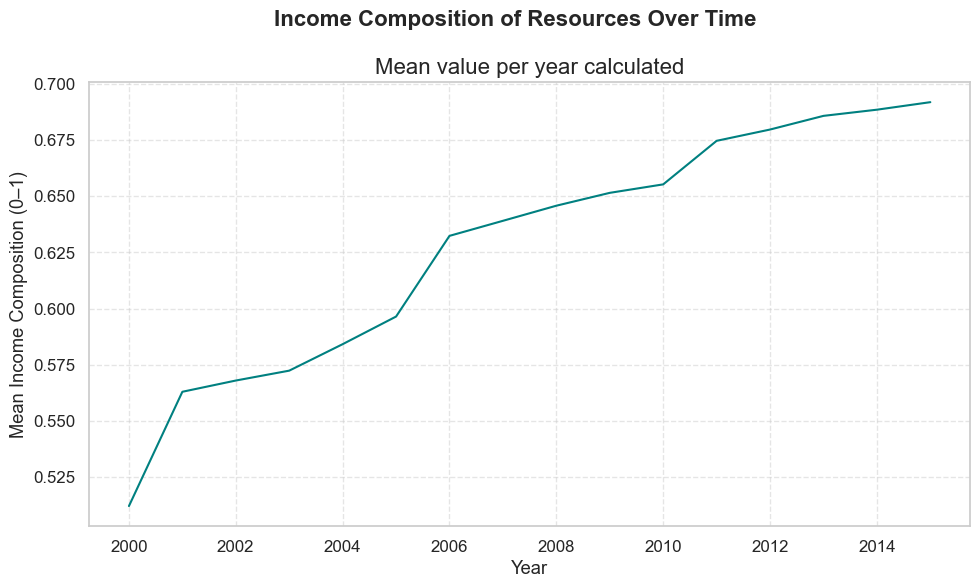

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='income_composition_of_resources', ci=None, color='teal')
plt.suptitle('Income Composition of Resources Over Time', x=0.525, fontsize=16, weight='bold')
plt.title('Mean value per year calculated', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mean Income Composition (0–1)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


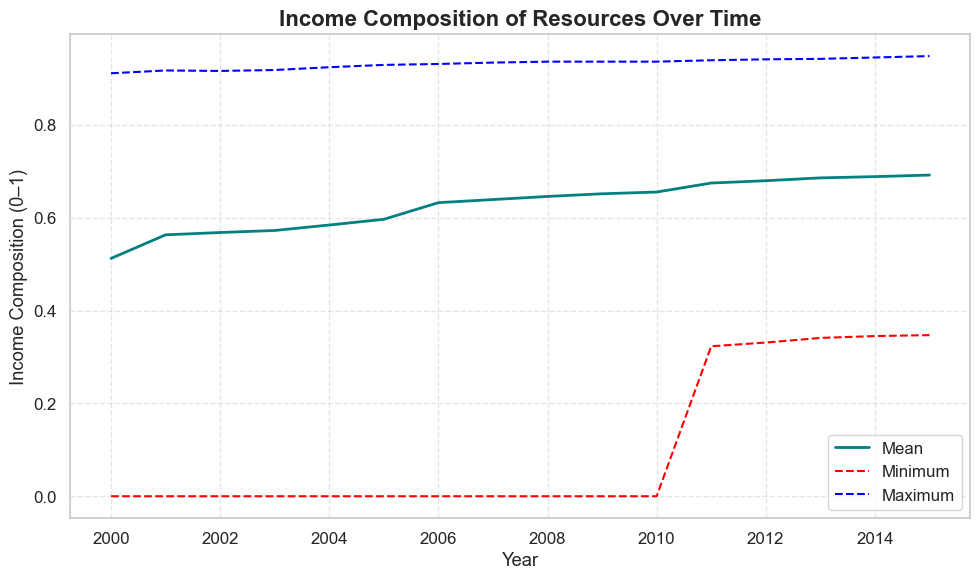

In [47]:
# Step 1: Compute statistics per year
summary = data.groupby('year')['income_composition_of_resources'].agg(['mean', 'min', 'max']).reset_index()

# Step 2: Plot all three lines on the same figure
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='mean', data=summary, label='Mean', color='teal', linewidth=2)
sns.lineplot(x='year', y='min', data=summary, label='Minimum', color='red', linestyle='--')
sns.lineplot(x='year', y='max', data=summary, label='Maximum', color='blue', linestyle='--')

# Labels and title
plt.title('Income Composition of Resources Over Time', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Income Composition (0–1)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Final remarks  
Due to the limitations of the lenght of the written assignment, not all of the analysis conducted here will be included in the final version of the assignment. 